# Installing and Loading Libraries

In [1]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=096f09d467fc1ebe433b52f7346f49a357264960d1d08ea330bf2f86ee1e1951
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [2]:
!pip install geocoder

     |████████████████████████████████| 98 kB 10.7 MB/s eta 0:00:01


In [3]:
!pip install folium 

     |████████████████████████████████| 94 kB 5.2 MB/s  eta 0:00:01


In [4]:
!pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN 

In [8]:
import seaborn as sns

# 1) Webscraping: Retrieving datasets on postal codes and create dataframes

## 1a) Retrieving information with the "request" and "beautifulsoap" libraries

In [9]:
url_toronto = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data_toronto = requests.get(url_toronto).text

In [10]:
#url_berlin = 'https://www.mapsofworld.com/postal-codes/germany/berlin/berlin.html'
#html_data_berlin = requests.get(url_berlin).text

In [11]:
url_berlin = 'https://www.dasoertliche.de/Themen/Postleitzahlen/Berlin.html'
html_data_berlin = requests.get(url_berlin).text

Parse the html data using beautiful_soup.

In [12]:
beautiful_soup_toronto = BeautifulSoup(html_data_toronto, 'html5lib')

In [13]:
beautiful_soup_berlin = BeautifulSoup(html_data_berlin, 'html5lib')

Extracting tables with the Beautifulsoap package

In [14]:
tables_toronto = beautiful_soup_toronto.find_all('table')

In [15]:
tables_berlin = beautiful_soup_berlin.find_all('table')

In [16]:
tables_berlin

[<table id="tl-plz">
             <tbody><tr>
               <th class="col1">PLZ</th>
               <th class="col2">Ortsname</th>
               <th class="col3">Ortsteil</th>
               <th class="col4">Landkreis</th>
               <th class="col5">Bundesland</th>
               
             </tr>
             
             <tr>
 				<td>10115</td>
 				<td>Berlin</td>	<!-- ok -->									
 				<td>Mitte<br/>Wedding
 </td>
 				<td>Berlin</td>
 				<td>Berlin</td>
 				
 			</tr>
             
             <tr>
 				<td>10117</td>
 				<td>Berlin</td>	<!-- ok -->									
 				<td>Kreuzberg<br/>Mitte<br/>Tiergarten
 </td>
 				<td>Berlin</td>
 				<td>Berlin</td>
 				
 			</tr>
             
             <tr>
 				<td>10119</td>
 				<td>Berlin</td>	<!-- ok -->									
 				<td>Mitte<br/>Prenzlauer Berg
 </td>
 				<td>Berlin</td>
 				<td>Berlin</td>
 				
 			</tr>
             
             <tr>
 				<td>10178</td>
 				<td>Berlin</td>	<!-- ok -->									
 				<td>Mitte

In [17]:
len(tables_toronto)

3

In [18]:
len(tables_berlin)

1

In [19]:
for index,table in enumerate(tables_toronto):
    if ("M3A" in str(table)):
        table_index_toronto = index

#print(table_index)

In [20]:
for index,table in enumerate(tables_berlin):
    if ("10115" in str(table)):
        table_index_berlin = index
        print('OK')

#print(table_index)

OK


## 1b) Creating dataframes

### Step 1: Creating a list with the information needed

#### Toronto

In [21]:
table_contents_toronto=[]

for row in tables_toronto[table_index_toronto].tbody.find_all('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents_toronto.append(cell)

In [22]:
table_contents_toronto

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'},
 {'PostalCode': 'M4A',
  'Borough': 'North York',
  'Neighborhood': 'Victoria Village'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhood': 'Regent Park, Harbourfront'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhood': 'Lawrence Manor, Lawrence Heights'},
 {'PostalCode': 'M7A',
  'Borough': "Queen's Park",
  'Neighborhood': 'Ontario Provincial Government'},
 {'PostalCode': 'M9A',
  'Borough': 'Etobicoke',
  'Neighborhood': 'Islington Avenue'},
 {'PostalCode': 'M1B',
  'Borough': 'Scarborough',
  'Neighborhood': 'Malvern, Rouge'},
 {'PostalCode': 'M3B',
  'Borough': 'North York',
  'Neighborhood': 'Don Mills North'},
 {'PostalCode': 'M4B',
  'Borough': 'East York',
  'Neighborhood': 'Parkview Hill, Woodbine Gardens'},
 {'PostalCode': 'M5B',
  'Borough': 'Downtown Toronto',
  'Neighborhood': 'Garden District, Ryerson'},
 {'PostalCode': 'M6B', 'Borough': 'North York', 'N

#### Berlin

In [23]:
table_contents_berlin=[]
table_headers = ['PLZ', 'Ortsname', 'Ortsteil', 'Landkreis', 'Bundesland']
i = 0
cell = {}

for segment in tables_berlin[table_index_berlin].tbody.find_all('tr'):
    i = 0
    table_contents_berlin.append(cell)
    cell = {}
    for index, row in enumerate(segment.find_all('td')):
        cell[table_headers[i]] = row.text
        #table_contents_berlin.append(cell)
        i = i+1

In [24]:
table_contents_berlin

[{},
 {},
 {'PLZ': '10115',
  'Ortsname': 'Berlin',
  'Ortsteil': 'MitteWedding\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10117',
  'Ortsname': 'Berlin',
  'Ortsteil': 'KreuzbergMitteTiergarten\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10119',
  'Ortsname': 'Berlin',
  'Ortsteil': 'MittePrenzlauer Berg\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10178',
  'Ortsname': 'Berlin',
  'Ortsteil': 'Mitte\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10179',
  'Ortsname': 'Berlin',
  'Ortsteil': 'FriedrichshainMitte\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10243',
  'Ortsname': 'Berlin',
  'Ortsteil': 'FriedrichshainKreuzbergMitte\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10245',
  'Ortsname': 'Berlin',
  'Ortsteil': 'Alt-TreptowFriedrichshain\n',
  'Landkreis': 'Berlin',
  'Bundesland': 'Berlin'},
 {'PLZ': '10247',
  'Ortsname': 'Berlin',
  'Ortsteil': 'Fr

### Step 2: Creating and cleaning dataframe

#### Toronto

In [25]:
df_toronto=pd.DataFrame(table_contents_toronto)
df_toronto['Borough']=df_toronto['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [26]:
df_toronto.head(20)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [27]:
df_toronto[df_toronto.iloc[:, 2] == "Not assigned"]

,PostalCode,Borough,Neighborhood


In [28]:
df_toronto.shape

(103, 3)

#### Berlin

In [29]:
df_berlin=pd.DataFrame(table_contents_berlin)
df_berlin.dropna(inplace=True)

In [30]:
df_berlin.columns = ['PLZ', 'Ortsname', 'Neighborhood', 'Landkreis', 'Bundesland']

In [31]:
df_berlin.reset_index(drop=True, inplace=True)

In [32]:
df_berlin

,PLZ,Ortsname,Neighborhood,Landkreis,Bundesland
0,10115,Berlin,MitteWedding\n,Berlin,Berlin
1,10117,Berlin,KreuzbergMitteTiergarten\n,Berlin,Berlin
2,10119,Berlin,MittePrenzlauer Berg\n,Berlin,Berlin
3,10178,Berlin,Mitte\n,Berlin,Berlin
4,10179,Berlin,FriedrichshainMitte\n,Berlin,Berlin
...,...,...,...,...,...
193,15345,Lichtenow Gem. Rüdersdorf bei Berlin,,Märkisch-Oderland,Brandenburg
194,15366,Neuenhagen b Berlin,,Märkisch-Oderland,Brandenburg
195,15562,Rüdersdorf bei Berlin,,Märkisch-Oderland,Brandenburg
196,15566,Schöneiche bei Berlin,,Oder-Spree,Brandenburg


In [33]:
df_berlin.shape

(198, 5)

# 2) Adding geo-tags with Foursquare

## 2a) Adding location data with the Foursquare API "geocoder" to each postal code in the dataframes

#### Toronto

In [34]:
latitude=[]
longitude=[]
for code in df_toronto['PostalCode']:
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
    #print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

In [35]:
df_toronto['Latitude'] = latitude
df_toronto['Longitude'] = longitude

In [36]:
df_toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto Business,Enclave of M4L,43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


#### Berlin

In [37]:
latitude=[]
longitude=[]
for code in df_berlin['PLZ']:
    g = geocoder.arcgis('{}, Berlin, Berlin'.format(code))
    #print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Berlin, Berlin'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

In [38]:
df_berlin['Latitude'] = latitude
df_berlin['Longitude'] = longitude

In [39]:
df_berlin

,PLZ,Ortsname,Neighborhood,Landkreis,Bundesland,Latitude,Longitude
0,10115,Berlin,MitteWedding\n,Berlin,Berlin,52.531946,13.383967
1,10117,Berlin,KreuzbergMitteTiergarten\n,Berlin,Berlin,52.514905,13.388769
2,10119,Berlin,MittePrenzlauer Berg\n,Berlin,Berlin,52.530188,13.405529
3,10178,Berlin,Mitte\n,Berlin,Berlin,52.521823,13.420031
4,10179,Berlin,FriedrichshainMitte\n,Berlin,Berlin,52.509239,13.416538
...,...,...,...,...,...,...,...
193,15345,Lichtenow Gem. Rüdersdorf bei Berlin,,Märkisch-Oderland,Brandenburg,52.516040,13.376910
194,15366,Neuenhagen b Berlin,,Märkisch-Oderland,Brandenburg,52.517967,13.687564
195,15562,Rüdersdorf bei Berlin,,Märkisch-Oderland,Brandenburg,52.516040,13.376910
196,15566,Schöneiche bei Berlin,,Oder-Spree,Brandenburg,52.477823,13.704582


## 2b) Adding venue information by postal code with the Forsquare API "getNearbyVenues" and grouping by neighbourhood

In [40]:
# The code was removed by Watson Studio for sharing.

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Toronto

In [42]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [43]:
print(toronto_venues.shape)
toronto_venues.head()

(2437, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75245,-79.32991,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.75245,-79.32991,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.75245,-79.32991,Brookbanks Pool,43.751389,-79.332184,Pool
3,Parkwoods,43.75245,-79.32991,Variety Store,43.751974,-79.333114,Food & Drink Shop
4,Victoria Village,43.73057,-79.31306,Wigmore Park,43.731023,-79.310771,Park


In [44]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,14,14,14,14,14,14
"Alderwood, Long Branch",4,4,4,4,4,4
"Bathurst Manor, Wilson Heights, Downsview North",2,2,2,2,2,2
Bayview Village,5,5,5,5,5,5
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Newtonbrook",23,23,23,23,23,23
Woburn,4,4,4,4,4,4
Woodbine Heights,20,20,20,20,20,20


#### Berlin

In [45]:
berlin_venues = getNearbyVenues(names=df_berlin['Neighborhood'],
                                   latitudes=df_berlin['Latitude'],
                                   longitudes=df_berlin['Longitude']
                                  )

MitteWedding

KreuzbergMitteTiergarten

MittePrenzlauer Berg

Mitte

FriedrichshainMitte

FriedrichshainKreuzbergMitte

Alt-TreptowFriedrichshain

FriedrichshainPrenzlauer Berg

FriedrichshainPrenzlauer Berg

FriedrichsfeldeLichtenbergRummelsburg

FriedrichsfeldeFriedrichshainKarlshorstLichtenbergRummelsburg

KarlshorstOberschöneweideRummelsburg

FriedrichsfeldeRummelsburg

FriedrichsfeldeLichtenberg

FennpfuhlLichtenberg

FennpfuhlLichtenberg

Prenzlauer Berg

FennpfuhlFriedrichshainPrenzlauer Berg

Prenzlauer BergWeißensee

MittePrenzlauer Berg

GesundbrunnenPrenzlauer Berg

GesundbrunnenPankowPrenzlauer Berg

Moabit

CharlottenburgMoabit

HansaviertelMoabit

HansaviertelMitteMoabitTiergarten

Moabit

Charlottenburg

Charlottenburg

Charlottenburg

CharlottenburgTiergarten

Charlottenburg

Charlottenburg

Charlottenburg

CharlottenburgHalenseeWilmersdorf

CharlottenburgHalenseeWilmersdorf

CharlottenburgGrunewaldHalenseeWestendWilmersdorf

Wilmersdorf

Wilmersdorf

Wilmersdorf

Charl

In [46]:
print(berlin_venues.shape)
berlin_venues.head()

(4162, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MitteWedding\n,52.531946,13.383967,Hotel i31,52.531107,13.384270,Hotel
1,MitteWedding\n,52.531946,13.383967,Oslo Kaffebar,52.531029,13.386889,Coffee Shop
2,MitteWedding\n,52.531946,13.383967,Kunstfabrik Schlot,52.530325,13.385230,Jazz Club
3,MitteWedding\n,52.531946,13.383967,Titanic Chaussee Berlin,52.532215,13.381012,Hotel
4,MitteWedding\n,52.531946,13.383967,BeachMitte,52.533821,13.384628,Volleyball Court


In [47]:
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
,104,104,104,104,104,104
AdlershofNiederschöneweide\n,28,28,28,28,28,28
Alt-Hohenschönhausen\n,17,17,17,17,17,17
Alt-HohenschönhausenBlankenburgMalchowNeu-HohenschönhausenStadtrandsiedlung MalchowWartenberg\n,1,1,1,1,1,1
Alt-HohenschönhausenHeinersdorfStadtrandsiedlung MalchowWeißensee\n,3,3,3,3,3,3
...,...,...,...,...,...,...
Steglitz\n,14,14,14,14,14,14
Wedding\n,28,28,28,28,28,28
Westend\n,12,12,12,12,12,12


# 	3) Formatting and filtering dataframes

## 3a) Creating table with dummy variables grouped by neighborhood

#### Toronto

In [48]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

In [49]:
#toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
toronto_onehot = toronto_onehot.drop('Neighborhood', axis = 1)

In [50]:
toronto_onehot = pd.concat([toronto_venues['Neighborhood'], toronto_onehot], axis=1, join="inner")
toronto_onehot

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,"Mimico NW, The Queensway West, South of Bloor,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2433,"Mimico NW, The Queensway West, South of Bloor,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2434,"Mimico NW, The Queensway West, South of Bloor,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2435,"Mimico NW, The Queensway West, South of Bloor,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#toronto_onehot['Neighborhood']

In [52]:
#toronto_onehot.shape

In [53]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
98,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
99,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
100,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
#toronto_grouped.shape

#### Berlin

In [55]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

In [56]:
#berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 
#berlin_onehot = berlin_onehot.drop('Neighborhood', axis = 1)

In [57]:
berlin_onehot = pd.concat([berlin_venues['Neighborhood'], berlin_onehot], axis=1, join="inner")
berlin_onehot

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,MitteWedding\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MitteWedding\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MitteWedding\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MitteWedding\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MitteWedding\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157,Friedersdorf b Berlin\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4158,Friedersdorf b Berlin\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4159,Friedersdorf b Berlin\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4160,Friedersdorf b Berlin\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#berlin_onehot['Neighborhood']

In [59]:
#berlin_onehot.shape

In [60]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AdlershofNiederschöneweide\n,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alt-Hohenschönhausen\n,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alt-HohenschönhausenBlankenburgMalchowNeu-Hohe...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alt-HohenschönhausenHeinersdorfStadtrandsiedlu...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Steglitz\n,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,Wedding\n,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,Westend\n,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,Wilmersdorf\n,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3b) Reviewing the complete list of venue categories to identify relevant venue. Filtering for "park" and saving results to dataframes

#### Toronto

In [61]:
#test_counts = toronto_grouped_clustering.value_counts()
#test_counts = pd.DataFrame(test_counts)
#test_counts

In [62]:
toronto_grouped.shape

(102, 272)

In [63]:
Column_names_toronto_check = list(toronto_grouped.columns)
Column_names_toronto_check

['Neighborhood',
 'Accessories Store',
 'Afghan Restaurant',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Arepa Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Basketball Stadium',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Café',
 'Camera Store',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Carpet Store',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chiropractor',
 'Chocolat

In [64]:
toronto_grouped = toronto_grouped.loc[toronto_grouped['Park'] != 0.0]
#df_corr2 = df_corr.loc[(df_corr['Anzahl_Formsubmissions_last1to3M'] < 30)
#toronto_grouped_parks

#### Berlin

In [65]:
berlin_grouped.shape

(143, 360)

In [66]:
Column_names_berlin_check = list(berlin_grouped.columns)
Column_names_berlin_check

['Neighborhood',
 'ATM',
 'Accessories Store',
 'Adult Boutique',
 'African Restaurant',
 'American Restaurant',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Austrian Restaurant',
 'Auto Dealership',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Bavarian Restaurant',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Boarding House',
 'Boat Rental',
 'Boat or Ferry',
 'Bookstore',
 'Border Crossing',
 'Bosnian Restaurant',
 'Boutique',
 'Bowling Alley',
 'Bowling Green',
 'Brasserie',
 'Bratwurst Joint',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Business Service',

In [67]:
berlin_grouped = berlin_grouped.loc[berlin_grouped['Park'] != 0.0]
#df_corr2 = df_corr.loc[(df_corr['Anzahl_Formsubmissions_last1to3M'] < 30)
#berlin_grouped_parks

## 3c) Reviewing and comparing size of dataframes filtered for "park" for the two cities to ensure that the dataset seemed as expected

#### Toronto

In [68]:
#toronto_columns = toronto_grouped.columns

In [69]:
toronto_grouped.shape

(53, 272)

In [70]:
toronto_sum = toronto_grouped.sum()
toronto_sum = pd.DataFrame(toronto_sum)
toronto_sum = toronto_sum.loc[toronto_sum[0] != 0.0]
toronto_sum

,0
Neighborhood,"Bayview VillageBerczy ParkBrockton, Parkdale V..."
Accessories Store,0.011494
Afghan Restaurant,0.011905
American Restaurant,0.297066
Antique Shop,0.035233
...,...
Video Store,0.0625
Vietnamese Restaurant,0.229065
Wine Bar,0.101697
Wine Shop,0.043478


In [71]:
toronto_sum.shape[0] / toronto_grouped.shape[0]

4.339622641509434

In [72]:
Column_names_toronto_check = list(toronto_grouped.columns)
Column_names_toronto_check

['Neighborhood',
 'Accessories Store',
 'Afghan Restaurant',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Arepa Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Basketball Stadium',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Café',
 'Camera Store',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Carpet Store',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chiropractor',
 'Chocolat

#### Berlin

In [73]:
berlin_grouped.shape

(41, 360)

In [74]:
berlin_sum = berlin_grouped.sum()
berlin_sum = pd.DataFrame(berlin_sum)
berlin_sum = berlin_sum.loc[berlin_sum[0] != 0.0]
berlin_sum

,0
Neighborhood,Alt-TreptowNeukölln\nBritzBuckowLichtenrade\nB...
Accessories Store,0.006061
Adult Boutique,0.043092
African Restaurant,0.062878
American Restaurant,0.02
...,...
Wine Bar,0.204984
Wine Shop,0.128675
Wings Joint,0.033903
Yoga Studio,0.010347


In [75]:
#berlin_sum.iloc[1:,0].sum()
berlin_sum.shape[0] / berlin_grouped.shape[0]

7.048780487804878

In [76]:
Column_names_berlin_check = list(berlin_grouped.columns)
Column_names_berlin_check

['Neighborhood',
 'ATM',
 'Accessories Store',
 'Adult Boutique',
 'African Restaurant',
 'American Restaurant',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Austrian Restaurant',
 'Auto Dealership',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Bavarian Restaurant',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Boarding House',
 'Boat Rental',
 'Boat or Ferry',
 'Bookstore',
 'Border Crossing',
 'Bosnian Restaurant',
 'Boutique',
 'Bowling Alley',
 'Bowling Green',
 'Brasserie',
 'Bratwurst Joint',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Business Service',

# 4) Cluster analysis of neighborhoods

## 4a) KMeans and DBSCAN

### Toronto

#### KMeans

In [77]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_toronto = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_toronto.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### DBSCAN

In [78]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(toronto_grouped_clustering)
distances, indices = neighbors_fit.kneighbors(toronto_grouped_clustering)

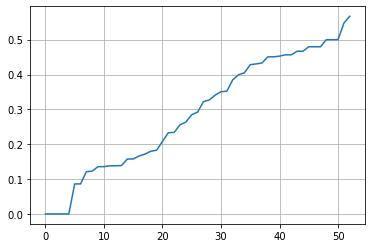

In [79]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#plt.ylim(0,0.4)
#plt.xlim(120,140)
plt.grid()

In [80]:
toronto_sum.shape[0] / toronto_grouped.shape[0]

4.339622641509434

In [81]:
epsilon = 0.5
minimumSamples = 4

db_toronto = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(toronto_grouped_clustering)
labels_DBSCAN_toronto = db_toronto.labels_
labels_DBSCAN_toronto

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1])

### Berlin

#### KMeans

In [82]:
# set number of clusters
kclusters = 3

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_berlin = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_berlin.labels_[0:10] 

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [83]:
kmeans_berlin.labels_[0:100] 

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int32)

#### DBSCAN

In [84]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(berlin_grouped_clustering)
distances, indices = neighbors_fit.kneighbors(berlin_grouped_clustering)

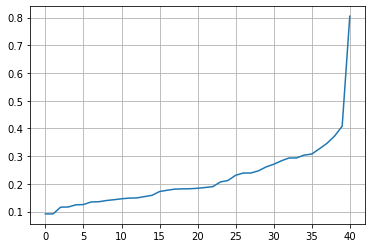

In [85]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#plt.ylim(0,0.4)
#plt.xlim(120,140)
plt.grid()

In [86]:
berlin_sum.shape[0] / berlin_grouped.shape[0]

7.048780487804878

In [87]:
epsilon = 0.35
minimumSamples = 6

db_berlin = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(berlin_grouped_clustering)
labels_DBSCAN_berlin = db_berlin.labels_
labels_DBSCAN_berlin

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

## 4b) Review of clusters

### Creating a dataframe with top-10 most commong venues

In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Toronto

In [89]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bayview Village,Trail,Park,Construction & Landscaping,Golf Driving Range,Moroccan Restaurant,Nail Salon,Music Venue,Museum,Moving Target,Movie Theater
5,Berczy Park,Coffee Shop,Seafood Restaurant,Bakery,Cocktail Bar,Farmers Market,Cheese Shop,Pharmacy,Lounge,Beer Bar,Restaurant
7,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Bar,Restaurant,Bakery,Gift Shop,Sandwich Place,Nightclub,Burrito Place,Falafel Restaurant
8,"CN Tower, King and Spadina, Railway Lands, Har...",Italian Restaurant,Coffee Shop,Café,Gym / Fitness Center,Bar,French Restaurant,Restaurant,Grocery Store,Park,Bakery
9,Caledonia-Fairbanks,Bakery,Gym,Beer Store,Café,Mexican Restaurant,Park,Sporting Goods Shop,Persian Restaurant,Performing Arts Venue,Middle Eastern Restaurant


In [90]:
toronto_neighborhoods_venues_sorted.shape

(53, 11)

#### Berlin

In [147]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
berlin_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
berlin_neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    berlin_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

berlin_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,,Plaza,Monument / Landmark,Museum,Asian Restaurant,Spa,Restaurant,Hotel,Bistro,Gourmet Shop,Indian Restaurant
8,Alt-TreptowNeukölln\n,Café,Breakfast Spot,Performing Arts Venue,Doner Restaurant,Bar,Eastern European Restaurant,Rock Club,Plaza,Pizza Place,Coffee Shop
23,BritzBuckowLichtenrade\n,Park,ATM,New American Restaurant,Performing Arts Venue,Pedestrian Plaza,Pastry Shop,Paper / Office Supplies Store,Palace,Pakistani Restaurant,Outdoors & Recreation
26,BritzNeuköllnTempelhof\n,Italian Restaurant,Bakery,Pub,Coffee Shop,Café,Supermarket,Doner Restaurant,Turkish Home Cooking Restaurant,Bus Stop,Candy Store
30,Charlottenburg\n,Italian Restaurant,Café,Vietnamese Restaurant,Hotel,Supermarket,Chinese Restaurant,Thai Restaurant,Coffee Shop,Plaza,Asian Restaurant


In [92]:
berlin_neighborhoods_venues_sorted.shape

(41, 11)

In [120]:
#berlin_neighborhoods_venues_sorted.tail(50)

### Adding clustering lables to top-10 venues dataframe

#### Toronto

In [94]:
# add clustering labels
toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels 1 (KMeans)', kmeans_toronto.labels_)
toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels 2 (DBSCAN)', labels_DBSCAN_toronto)

toronto_merged = df_toronto

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels 2 (DBSCAN),Cluster Labels 1 (KMeans),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75245,-79.32991,0.0,0.0,Park,Fast Food Restaurant,Pool,Food & Drink Shop,Moroccan Restaurant,Nail Salon,Music Venue,Museum,Moving Target,Movie Theater
1,M4A,North York,Victoria Village,43.73057,-79.31306,0.0,0.0,Grocery Store,Park,Nail Salon,German Restaurant,New American Restaurant,Music Venue,Museum,Moving Target,Movie Theater,Accessories Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188,0.0,1.0,Coffee Shop,Italian Restaurant,Gastropub,Theater,Café,Fried Chicken Joint,Falafel Restaurant,Sandwich Place,Bank,Park


In [95]:
toronto_merged.dropna(inplace=True)

In [96]:
toronto_merged.shape

(53, 17)

#### Berlin

In [97]:
berlin_neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,,Plaza,Monument / Landmark,Museum,Asian Restaurant,Spa,Restaurant,Hotel,Bistro,Gourmet Shop,Indian Restaurant
8,Alt-TreptowNeukölln\n,Café,Breakfast Spot,Performing Arts Venue,Doner Restaurant,Bar,Eastern European Restaurant,Rock Club,Plaza,Pizza Place,Coffee Shop
23,BritzBuckowLichtenrade\n,Park,ATM,New American Restaurant,Performing Arts Venue,Pedestrian Plaza,Pastry Shop,Paper / Office Supplies Store,Palace,Pakistani Restaurant,Outdoors & Recreation
26,BritzNeuköllnTempelhof\n,Italian Restaurant,Bakery,Pub,Coffee Shop,Café,Supermarket,Doner Restaurant,Turkish Home Cooking Restaurant,Bus Stop,Candy Store
30,Charlottenburg\n,Italian Restaurant,Café,Vietnamese Restaurant,Hotel,Supermarket,Chinese Restaurant,Thai Restaurant,Coffee Shop,Plaza,Asian Restaurant
35,CharlottenburgHalenseeWilmersdorf\n,Hotel,Italian Restaurant,Bakery,Chinese Restaurant,Supermarket,Plaza,Bar,Sushi Restaurant,Restaurant,Vietnamese Restaurant
41,CharlottenburgWestend\n,Café,Hotel,Boarding House,Bakery,Organic Grocery,Art Museum,Doner Restaurant,Asian Restaurant,Falafel Restaurant,Taverna
45,DahlemGrunewaldSchmargendorfWilmersdorf\n,Italian Restaurant,Ice Cream Shop,Park,Drugstore,Café,Bank,Bakery,Mobile Phone Shop,Coffee Shop,Chinese Restaurant
47,DahlemLichterfeldeSteglitz\n,Italian Restaurant,Supermarket,Bank,Bakery,Park,Whisky Bar,Plaza,Vietnamese Restaurant,Outdoor Sculpture,Pastry Shop
54,FennpfuhlFriedrichshainPrenzlauer Berg\n,Nightclub,Park,Supermarket,Soccer Field,Stadium,Fast Food Restaurant,Big Box Store,Bowling Alley,Laser Tag,Playground


In [148]:
# add clustering labels
berlin_neighborhoods_venues_sorted.insert(0, 'Cluster Labels 1 (KMeans)', kmeans_berlin.labels_)
berlin_neighborhoods_venues_sorted.insert(0, 'Cluster Labels 2 (DBSCAN)', labels_DBSCAN_berlin)

berlin_merged = df_berlin

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(berlin_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

berlin_merged.head() # check the last columns!

,PLZ,Ortsname,Neighborhood,Landkreis,Bundesland,Latitude,Longitude,Cluster Labels 2 (DBSCAN),Cluster Labels 1 (KMeans),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Berlin,MitteWedding\n,Berlin,Berlin,52.531946,13.383967,0.0,1.0,Hotel,Coffee Shop,Gym / Fitness Center,Supermarket,Drugstore,Nightclub,Beer Bar,Ice Cream Shop,Miscellaneous Shop,Hostel
1,10117,Berlin,KreuzbergMitteTiergarten\n,Berlin,Berlin,52.514905,13.388769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10119,Berlin,MittePrenzlauer Berg\n,Berlin,Berlin,52.530188,13.405529,0.0,1.0,Italian Restaurant,Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Coffee Shop,Pizza Place,Bar,Bakery,Ice Cream Shop,French Restaurant
3,10178,Berlin,Mitte\n,Berlin,Berlin,52.521823,13.420031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10179,Berlin,FriedrichshainMitte\n,Berlin,Berlin,52.509239,13.416538,0.0,1.0,Sushi Restaurant,Nightclub,Café,Italian Restaurant,Plaza,Bakery,History Museum,Hotel,Bistro,Park


In [149]:
berlin_merged.dropna(inplace=True)

In [150]:
#berlin_merged.shape
berlin_neighborhoods_venues_sorted.head(50)

,Cluster Labels 2 (DBSCAN),Cluster Labels 1 (KMeans),Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,1,,Plaza,Monument / Landmark,Museum,Asian Restaurant,Spa,Restaurant,Hotel,Bistro,Gourmet Shop,Indian Restaurant
8,0,1,Alt-TreptowNeukölln\n,Café,Breakfast Spot,Performing Arts Venue,Doner Restaurant,Bar,Eastern European Restaurant,Rock Club,Plaza,Pizza Place,Coffee Shop
23,-1,2,BritzBuckowLichtenrade\n,Park,ATM,New American Restaurant,Performing Arts Venue,Pedestrian Plaza,Pastry Shop,Paper / Office Supplies Store,Palace,Pakistani Restaurant,Outdoors & Recreation
26,0,1,BritzNeuköllnTempelhof\n,Italian Restaurant,Bakery,Pub,Coffee Shop,Café,Supermarket,Doner Restaurant,Turkish Home Cooking Restaurant,Bus Stop,Candy Store
30,0,1,Charlottenburg\n,Italian Restaurant,Café,Vietnamese Restaurant,Hotel,Supermarket,Chinese Restaurant,Thai Restaurant,Coffee Shop,Plaza,Asian Restaurant
35,0,1,CharlottenburgHalenseeWilmersdorf\n,Hotel,Italian Restaurant,Bakery,Chinese Restaurant,Supermarket,Plaza,Bar,Sushi Restaurant,Restaurant,Vietnamese Restaurant
41,0,1,CharlottenburgWestend\n,Café,Hotel,Boarding House,Bakery,Organic Grocery,Art Museum,Doner Restaurant,Asian Restaurant,Falafel Restaurant,Taverna
45,0,1,DahlemGrunewaldSchmargendorfWilmersdorf\n,Italian Restaurant,Ice Cream Shop,Park,Drugstore,Café,Bank,Bakery,Mobile Phone Shop,Coffee Shop,Chinese Restaurant
47,0,1,DahlemLichterfeldeSteglitz\n,Italian Restaurant,Supermarket,Bank,Bakery,Park,Whisky Bar,Plaza,Vietnamese Restaurant,Outdoor Sculpture,Pastry Shop
54,0,0,FennpfuhlFriedrichshainPrenzlauer Berg\n,Nightclub,Park,Supermarket,Soccer Field,Stadium,Fast Food Restaurant,Big Box Store,Bowling Alley,Laser Tag,Playground


In [151]:
berlin_merged.head(50)

,PLZ,Ortsname,Neighborhood,Landkreis,Bundesland,Latitude,Longitude,Cluster Labels 2 (DBSCAN),Cluster Labels 1 (KMeans),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Berlin,MitteWedding\n,Berlin,Berlin,52.531946,13.383967,0.0,1.0,Hotel,Coffee Shop,Gym / Fitness Center,Supermarket,Drugstore,Nightclub,Beer Bar,Ice Cream Shop,Miscellaneous Shop,Hostel
2,10119,Berlin,MittePrenzlauer Berg\n,Berlin,Berlin,52.530188,13.405529,0.0,1.0,Italian Restaurant,Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Coffee Shop,Pizza Place,Bar,Bakery,Ice Cream Shop,French Restaurant
4,10179,Berlin,FriedrichshainMitte\n,Berlin,Berlin,52.509239,13.416538,0.0,1.0,Sushi Restaurant,Nightclub,Café,Italian Restaurant,Plaza,Bakery,History Museum,Hotel,Bistro,Park
10,10317,Berlin,FriedrichsfeldeFriedrichshainKarlshorstLichten...,Berlin,Berlin,52.498890,13.490919,0.0,1.0,Bus Stop,Italian Restaurant,Café,Soccer Field,Park,Photography Studio,Big Box Store,Boarding House,Supermarket,Other Repair Shop
11,10318,Berlin,KarlshorstOberschöneweideRummelsburg\n,Berlin,Berlin,52.483065,13.526646,0.0,1.0,Bakery,Tram Station,Supermarket,Café,Organic Grocery,Italian Restaurant,Park,Bar,Post Office,Drugstore
14,10367,Berlin,FennpfuhlLichtenberg\n,Berlin,Berlin,52.523550,13.483778,0.0,1.0,Supermarket,Tram Station,Park,Plaza,Italian Restaurant,Bistro,Greek Restaurant,Squash Court,Café,Pharmacy
15,10369,Berlin,FennpfuhlLichtenberg\n,Berlin,Berlin,52.531225,13.469809,0.0,1.0,Supermarket,Tram Station,Park,Plaza,Italian Restaurant,Bistro,Greek Restaurant,Squash Court,Café,Pharmacy
17,10407,Berlin,FennpfuhlFriedrichshainPrenzlauer Berg\n,Berlin,Berlin,52.534585,13.450152,0.0,0.0,Nightclub,Park,Supermarket,Soccer Field,Stadium,Fast Food Restaurant,Big Box Store,Bowling Alley,Laser Tag,Playground
18,10409,Berlin,Prenzlauer BergWeißensee\n,Berlin,Berlin,52.544254,13.442296,0.0,1.0,Supermarket,Drugstore,Bakery,Video Store,Public Art,Organic Grocery,Gym / Fitness Center,Café,Hardware Store,Park
19,10435,Berlin,MittePrenzlauer Berg\n,Berlin,Berlin,52.537145,13.410300,0.0,1.0,Italian Restaurant,Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Coffee Shop,Pizza Place,Bar,Bakery,Ice Cream Shop,French Restaurant


In [152]:
berlin_merged.shape

(78, 19)

In [153]:
berlin_merged = berlin_merged.drop_duplicates(subset=['Neighborhood'])

In [156]:
berlin_merged.shape

(41, 19)

In [157]:
berlin_merged.head()

,PLZ,Ortsname,Neighborhood,Landkreis,Bundesland,Latitude,Longitude,Cluster Labels 2 (DBSCAN),Cluster Labels 1 (KMeans),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Berlin,MitteWedding\n,Berlin,Berlin,52.531946,13.383967,0.0,1.0,Hotel,Coffee Shop,Gym / Fitness Center,Supermarket,Drugstore,Nightclub,Beer Bar,Ice Cream Shop,Miscellaneous Shop,Hostel
2,10119,Berlin,MittePrenzlauer Berg\n,Berlin,Berlin,52.530188,13.405529,0.0,1.0,Italian Restaurant,Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Coffee Shop,Pizza Place,Bar,Bakery,Ice Cream Shop,French Restaurant
4,10179,Berlin,FriedrichshainMitte\n,Berlin,Berlin,52.509239,13.416538,0.0,1.0,Sushi Restaurant,Nightclub,Café,Italian Restaurant,Plaza,Bakery,History Museum,Hotel,Bistro,Park
10,10317,Berlin,FriedrichsfeldeFriedrichshainKarlshorstLichten...,Berlin,Berlin,52.498890,13.490919,0.0,1.0,Bus Stop,Italian Restaurant,Café,Soccer Field,Park,Photography Studio,Big Box Store,Boarding House,Supermarket,Other Repair Shop
11,10318,Berlin,KarlshorstOberschöneweideRummelsburg\n,Berlin,Berlin,52.483065,13.526646,0.0,1.0,Bakery,Tram Station,Supermarket,Café,Organic Grocery,Italian Restaurant,Park,Bar,Post Office,Drugstore


## 4b) Distribution of clusters

In [127]:
toronto_merged['Cluster Labels 1 (KMeans)'].value_counts()

1.0    37
0.0    14
2.0     2
Name: Cluster Labels 1 (KMeans), dtype: int64

In [128]:
toronto_merged['Cluster Labels 2 (DBSCAN)'].value_counts()

 0.0    47
-1.0     6
Name: Cluster Labels 2 (DBSCAN), dtype: int64

In [129]:
berlin_merged['Cluster Labels 1 (KMeans)'].value_counts()

1.0    35
0.0     5
2.0     1
Name: Cluster Labels 1 (KMeans), dtype: int64

In [130]:
berlin_merged['Cluster Labels 2 (DBSCAN)'].value_counts()

 0.0    38
-1.0     3
Name: Cluster Labels 2 (DBSCAN), dtype: int64

# 5) Creating bar and pie charts for main clusters

## 5a) Create dataframes with top-10 Venues for the two largest DBSCAN-clusters for each city

### Toronto

#### Cluster 1

In [131]:
toronto_cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels 2 (DBSCAN)'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


In [132]:
toronto_cluster_1_count = []

for column in range(3,13):
    toronto_cluster_1_count.append(toronto_cluster_1.iloc[:, column].value_counts())

In [133]:
toronto_cluster_1_count = pd.DataFrame(toronto_cluster_1_count)
toronto_cluster_1_count = toronto_cluster_1_count.transpose().reset_index()
toronto_cluster_1_count['Sum'] = toronto_cluster_1_count.sum(axis=1)
toronto_cluster_1_count = toronto_cluster_1_count[['index', 'Sum']]
toronto_cluster_1_count = toronto_cluster_1_count.sort_values(by=['Sum'], ascending=False)

pie_chart_toronto_cluster_1 = toronto_cluster_1_count.iloc[0:5,:]
rest = {'index':'Rest', 'Sum':toronto_cluster_1_count['Sum'][5:len(toronto_cluster_1_count)].sum()}
pie_chart_toronto_cluster_1 = pie_chart_toronto_cluster_1.append(rest, ignore_index = True)

#### Cluster 2

In [134]:
toronto_cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels 2 (DBSCAN)'] == -1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


In [135]:
toronto_cluster_2_count = []

for column in range(3,13):
    toronto_cluster_2_count.append(toronto_cluster_2.iloc[:, column].value_counts())

In [136]:
toronto_cluster_2_count = pd.DataFrame(toronto_cluster_2_count)
toronto_cluster_2_count = toronto_cluster_2_count.transpose().reset_index()
toronto_cluster_2_count['Sum'] = toronto_cluster_2_count.sum(axis=1)
toronto_cluster_2_count = toronto_cluster_2_count[['index', 'Sum']]
toronto_cluster_2_count = toronto_cluster_2_count.sort_values(by=['Sum'], ascending=False)

pie_chart_toronto_cluster_2 = toronto_cluster_2_count.iloc[0:5,:]
rest = {'index':'Rest', 'Sum':toronto_cluster_2_count['Sum'][5:len(toronto_cluster_2_count)].sum()}
pie_chart_toronto_cluster_2 = pie_chart_toronto_cluster_2.append(rest, ignore_index = True)

### Berlin

#### Cluster 1

In [137]:
berlin_cluster_1 = berlin_merged.loc[berlin_merged['Cluster Labels 2 (DBSCAN)'] == 0, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

In [138]:
berlin_cluster_1_count = []

for column in range(5,15):
    berlin_cluster_1_count.append(berlin_cluster_1.iloc[:, column].value_counts())

In [139]:
berlin_cluster_1_count = pd.DataFrame(berlin_cluster_1_count)
berlin_cluster_1_count = berlin_cluster_1_count.transpose().reset_index()
berlin_cluster_1_count['Sum'] = berlin_cluster_1_count.sum(axis=1)
berlin_cluster_1_count = berlin_cluster_1_count[['index', 'Sum']]
berlin_cluster_1_count = berlin_cluster_1_count.sort_values(by=['Sum'], ascending=False)

pie_chart_berlin_cluster_1 = berlin_cluster_1_count.iloc[0:5,:]
rest = {'index':'Rest', 'Sum':berlin_cluster_1_count['Sum'][5:len(berlin_cluster_1_count)].sum()}
pie_chart_berlin_cluster_1 = pie_chart_berlin_cluster_1.append(rest, ignore_index = True)

#### Cluster 2

In [140]:
berlin_cluster_2 = berlin_merged.loc[berlin_merged['Cluster Labels 2 (DBSCAN)'] == -1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

In [141]:
berlin_cluster_2_count = []

for column in range(5,15):
    berlin_cluster_2_count.append(berlin_cluster_2.iloc[:, column].value_counts())

In [142]:
berlin_cluster_2_count = pd.DataFrame(berlin_cluster_2_count)
berlin_cluster_2_count = berlin_cluster_2_count.transpose().reset_index()
berlin_cluster_2_count['Sum'] = berlin_cluster_2_count.sum(axis=1)
berlin_cluster_2_count = berlin_cluster_2_count[['index', 'Sum']]
berlin_cluster_2_count = berlin_cluster_2_count.sort_values(by=['Sum'], ascending=False)

In [143]:
pie_chart_berlin_cluster_2 = berlin_cluster_2_count.iloc[0:5,:]
rest = {'index':'Rest', 'Sum':berlin_cluster_2_count['Sum'][5:len(berlin_cluster_2_count)].sum()}
pie_chart_berlin_cluster_2 = pie_chart_berlin_cluster_2.append(rest, ignore_index = True)

## 5b) Charts

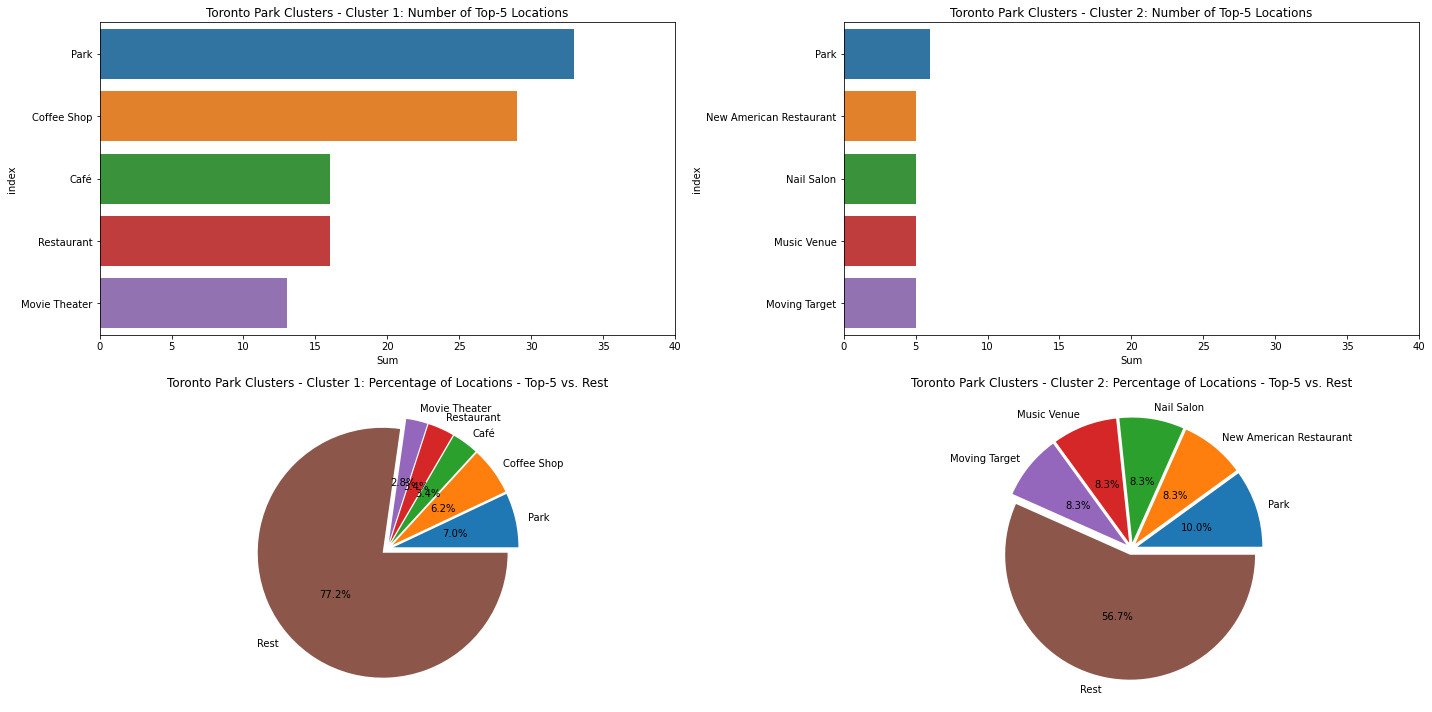

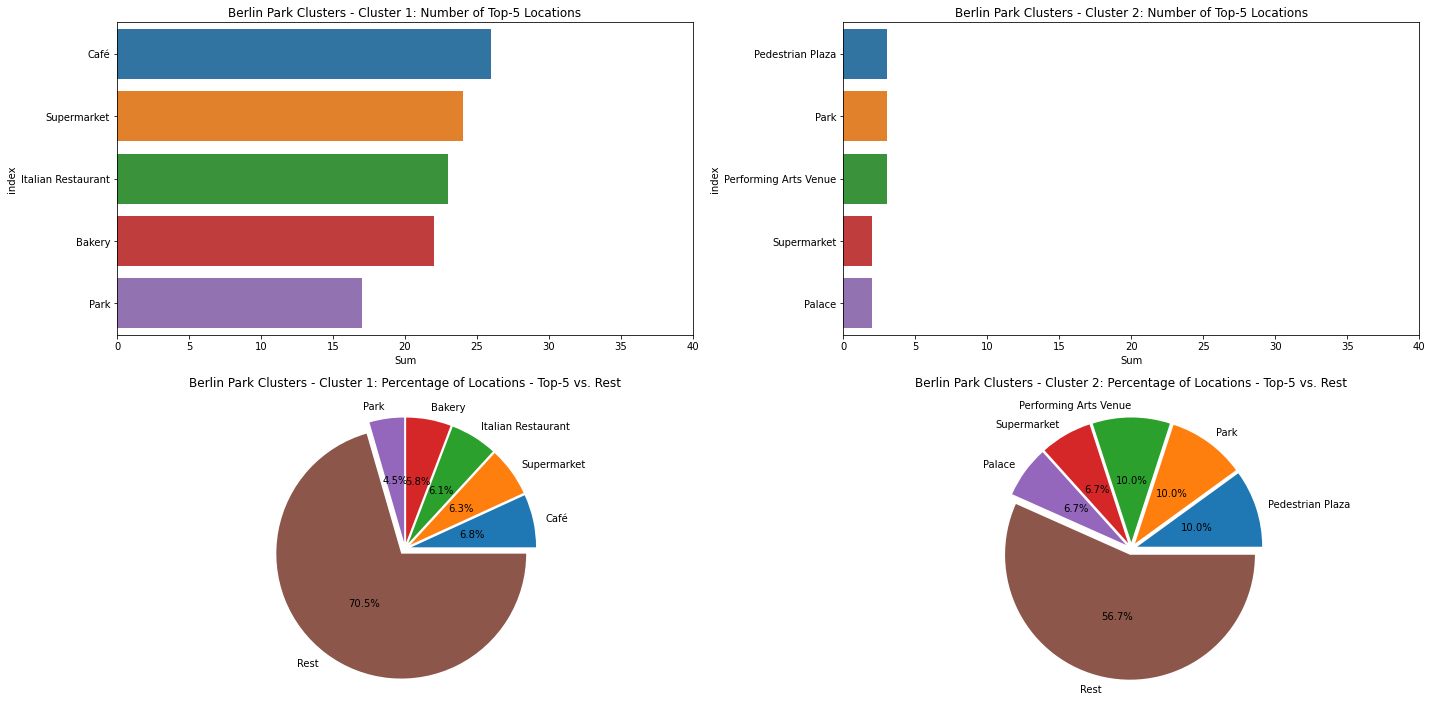

In [158]:
# Toronto

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
figure, ax = plt.subplots(2, 2)
ax = ax.flatten()
ax[0].set_title('Toronto Park Clusters - Cluster 1: Number of Top-5 Locations')
ax[1].set_title('Toronto Park Clusters - Cluster 2: Number of Top-5 Locations')
ax[0].set(xlim=(0, 40))
ax[1].set(xlim=(0, 40))
sns.barplot(x='Sum', y='index', data=toronto_cluster_1_count.iloc[0:5,:], ax=ax[0])
sns.barplot(x='Sum', y='index', data=toronto_cluster_2_count.iloc[0:5,:], ax=ax[1])

plt.subplot(2, 2, 3)
plt.pie(x=pie_chart_toronto_cluster_1['Sum'], autopct="%.1f%%", explode=[0.05]*6, labels=pie_chart_toronto_cluster_1['index'], pctdistance=0.5)
plt.title('Toronto Park Clusters - Cluster 1: Percentage of Locations - Top-5 vs. Rest')

plt.subplot(2, 2, 4)
plt.pie(x=pie_chart_toronto_cluster_2['Sum'], autopct="%.1f%%", explode=[0.05]*6, labels=pie_chart_toronto_cluster_2['index'], pctdistance=0.5)
plt.title('Toronto Park Clusters - Cluster 2: Percentage of Locations - Top-5 vs. Rest')

# Berlin

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
figure, ax = plt.subplots(2, 2)
ax = ax.flatten()
ax[0].set_title('Berlin Park Clusters - Cluster 1: Number of Top-5 Locations')
ax[1].set_title('Berlin Park Clusters - Cluster 2: Number of Top-5 Locations')
ax[0].set(xlim=(0, 40))
ax[1].set(xlim=(0, 40))
sns.barplot(x='Sum', y='index', data=berlin_cluster_1_count.iloc[0:5,:], ax=ax[0])
sns.barplot(x='Sum', y='index', data=berlin_cluster_2_count.iloc[0:5,:], ax=ax[1])

plt.subplot(2, 2, 3)
plt.pie(x=pie_chart_berlin_cluster_1['Sum'], autopct="%.1f%%", explode=[0.05]*6, labels=pie_chart_berlin_cluster_1['index'], pctdistance=0.5)
plt.title('Berlin Park Clusters - Cluster 1: Percentage of Locations - Top-5 vs. Rest')

plt.subplot(2, 2, 4)
plt.pie(x=pie_chart_berlin_cluster_2['Sum'], autopct="%.1f%%", explode=[0.05]*6, labels=pie_chart_berlin_cluster_2['index'], pctdistance=0.5)
plt.title('Berlin Park Clusters - Cluster 2: Percentage of Locations - Top-5 vs. Rest')

plt.show()